In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.datasets import co2
from pandas.plotting import register_matplotlib_converters
from statsmodels.datasets import elec_equip as ds
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA

register_matplotlib_converters()



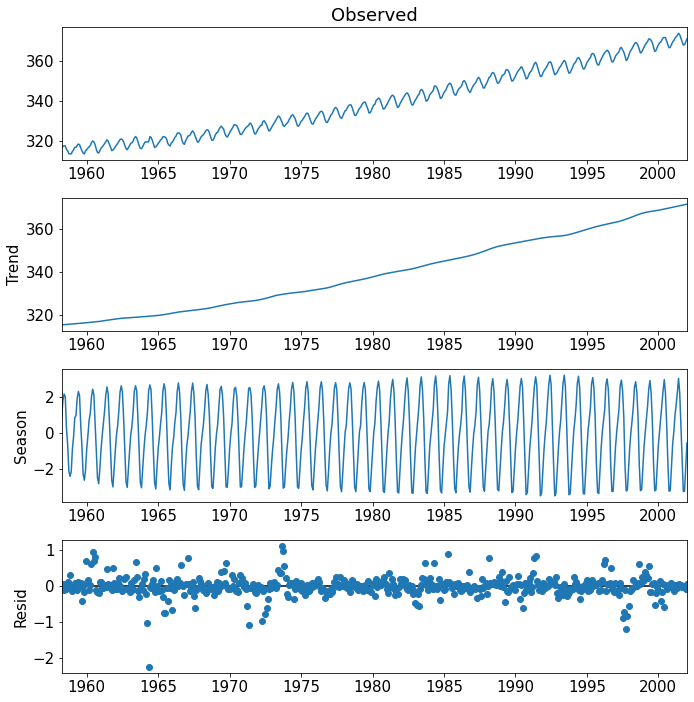

In [56]:
data=co2.load(True).data
data=data.resample('M').mean().ffill()
plt.rcParams.update({'figure.figsize':(10,10)})
stl=STL(data,period=12,robust=True)

res_robust=stl.fit()
fig=res_robust.plot()

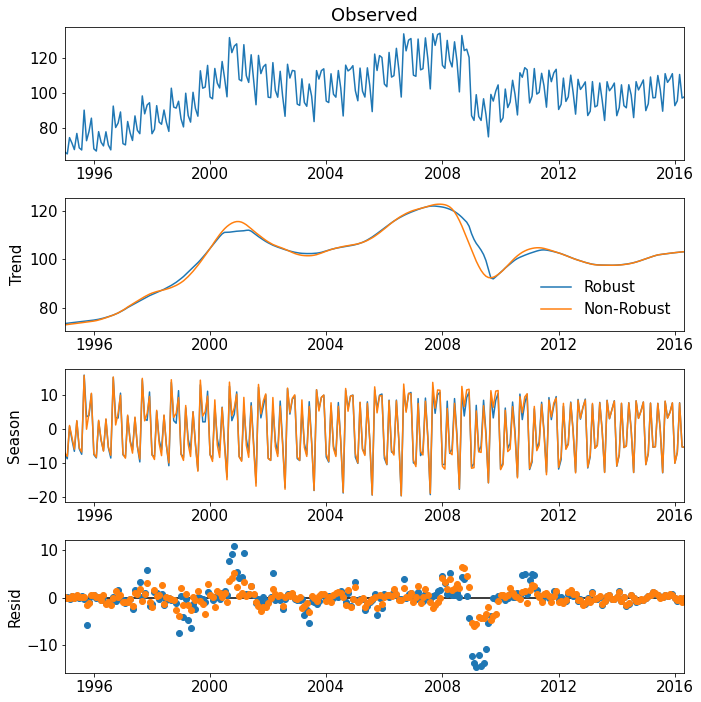

In [19]:
elec_equip=ds.load(as_pandas=True).data
plt.rcParams.update({'font.size': 15})

def add_stl_plot(fig, res, legend):
    axs=fig.get_axes()
    comps=['trend','seasonal','resid']
    
    for ax,comp in zip(axs[1:],comps):
        series = getattr(res,comp)
        if comp=='resid':
            ax.plot(series, marker='o',linestyle='none')
        else:
            ax.plot(series)
            if comp=='trend':
                ax.legend(legend,frameon=False)
                
stl=STL(elec_equip, period=12, robust=True)
res_robust=stl.fit()
fig=res_robust.plot()


res_non_robust=STL(elec_equip, period=12, robust=False).fit()

add_stl_plot(fig,res_non_robust, ['Robust','Non-Robust'])

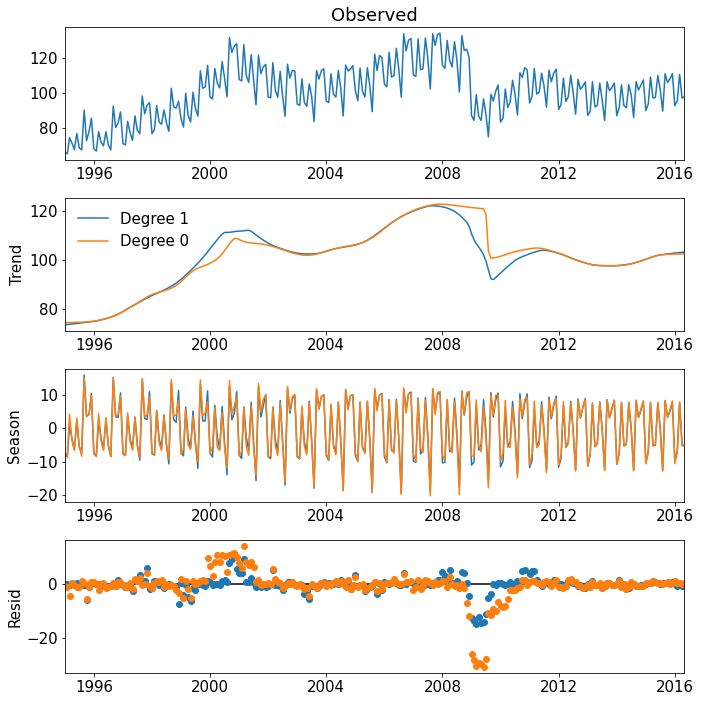

In [39]:

stl=STL(elec_equip, period=12, seasonal_deg=0, trend_deg=0, low_pass_deg=0,robust=True)
res_deg_0=stl.fit()
fig=res_robust.plot()
add_stl_plot(fig,res_deg_0, ['Degree 1', 'Degree 0'])

In [71]:
data['trend']=res_robust.trend
data['seasonality']=data.co2-res_robust.trend
data['seasonal']=res_robust.seasonal
data['resid']=data.seasonality-data.seasonal

X_index=data.index

display(data.head(10))
display(data.tail(10))

,co2,trend,seasonality,seasonal,resid
1958-03-31,316.100000,315.271130,0.828870,0.839580,-0.010711
1958-04-30,317.200000,315.315435,1.884565,1.823917,0.060648
1958-05-31,317.433333,315.359672,2.073661,2.180186,-0.106525
1958-06-30,317.433333,315.403825,2.029508,2.038076,-0.008568
1958-07-31,315.625000,315.447926,0.177074,0.263979,-0.086905
1958-08-31,314.950000,315.492042,-0.542042,-0.664390,0.122348
1958-09-30,313.500000,315.536294,-2.036294,-2.102605,0.066311
1958-10-31,313.500000,315.580784,-2.080784,-2.401045,0.320262
1958-11-30,313.425000,315.625565,-2.200565,-2.124086,-0.076479
1958-12-31,314.700000,315.670552,-0.970552,-0.836715,-0.133838


,co2,trend,seasonality,seasonal,resid
2001-03-31,372.060,370.448166,1.611834,1.586655,0.025179
2001-04-30,372.775,370.565697,2.209303,2.251190,-0.041887
2001-05-31,373.800,370.683381,3.116619,3.047670,0.068949
2001-06-30,373.060,370.801174,2.258826,2.226644,0.032182
2001-07-31,371.300,370.919013,0.380987,0.357125,0.023862
2001-08-31,369.425,371.036841,-1.611841,-1.590735,-0.021106
2001-09-30,367.880,371.154605,-3.274605,-3.246440,-0.028165
2001-10-31,368.050,371.272281,-3.222281,-3.219810,-0.002471
2001-11-30,369.375,371.389866,-2.014866,-1.947464,-0.067402
2001-12-31,371.020,371.507373,-0.487373,-0.541980,0.054607


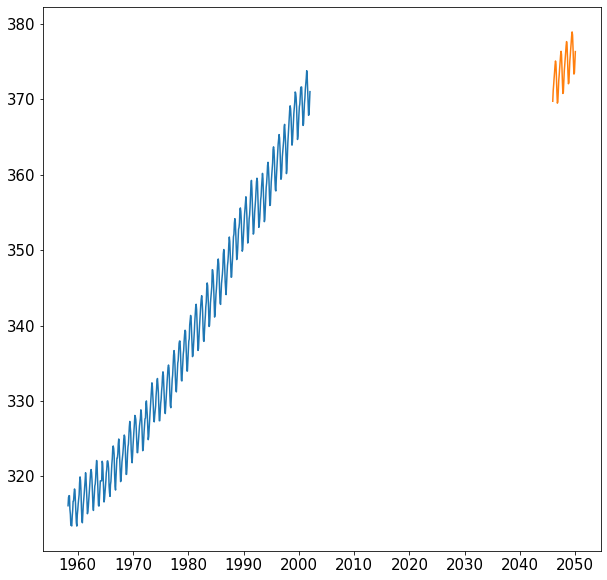

In [77]:
stlf=STLForecast(data.co2, model=ARIMA, model_kwargs=dict(order=(1,1,0), trend='t'))
stlf_res=stlf.fit()
forecast=stlf_res.forecast(data.shape[0]+50)
plt.plot(data.co2)
plt.plot(forecast[data.shape[0]:])
